In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
cube0 = fits.open("0_lwsynth_100.0.fits")[0].data
cube1 = fits.open("150_lwsynth_100.0.fits")[0].data

In [4]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 600.0 / 1.665 / pixelsize

In [5]:
from scipy.ndimage import gaussian_filter
from scipy.stats import pearsonr

In [6]:
image4 = cube0[:,:,0,4]
image5 = cube1[:,:,0,4]
vel_x500nm, vel_y500nm, vm500nm = pyflct.flct(image4, image5, delta_t, pixelsize, sigma, quiet = True)

In [7]:
Vx_LW_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[0].data
Vy_LW_600 = fits.open("pyFLCT_fwhm_600_dt_30_500nmInte_tracked.fits")[1].data

In [8]:
Vx_tracked_600_30 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[0].data
Vy_tracked_600_30 = fits.open("pyFLCT_fwhm_600_dt_30_Inte%3_tracked.fits")[1].data

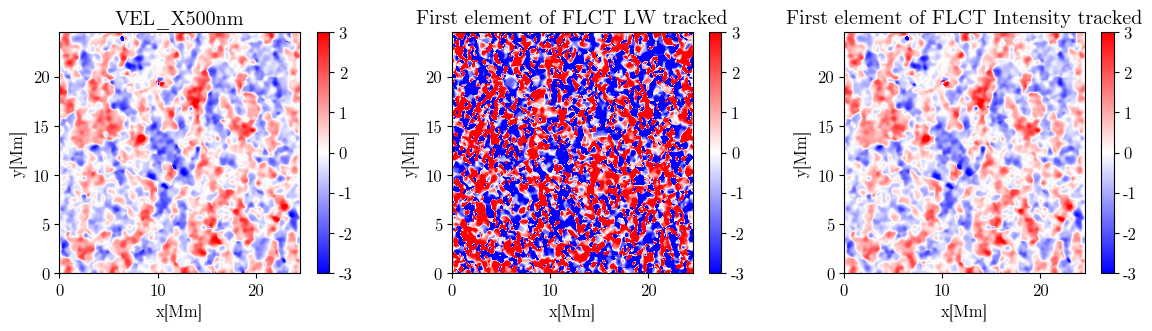

In [9]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("VEL_X500nm")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(vel_x500nm[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("First element of FLCT LW tracked")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_LW_600[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()


plt.subplot(133)                                      # atmos[1] temp
plt.title("First element of FLCT Intensity tracked")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_tracked_600_30[0, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()

fig.tight_layout()
plt.savefig("_hh_ff", dpi = 100)

In [10]:
r_x500nm = pearsonr(vel_x500nm.flatten(), Vx_LW_600[0].flatten())
print(r_x500nm)

PearsonRResult(statistic=0.1701657040792318, pvalue=0.0)


In [11]:
cube3 = fits.open("450_lwsynth_100.0.fits")[0].data
cube4 = fits.open("600_lwsynth_100.0.fits")[0].data

In [12]:
image7 = cube3[:,:,0,4]
image8 = cube4[:,:,0,4]
vel_x500nm2, vel_y500nm2, vm500nm2 = pyflct.flct(image7, image8, delta_t, pixelsize, sigma, quiet = True)

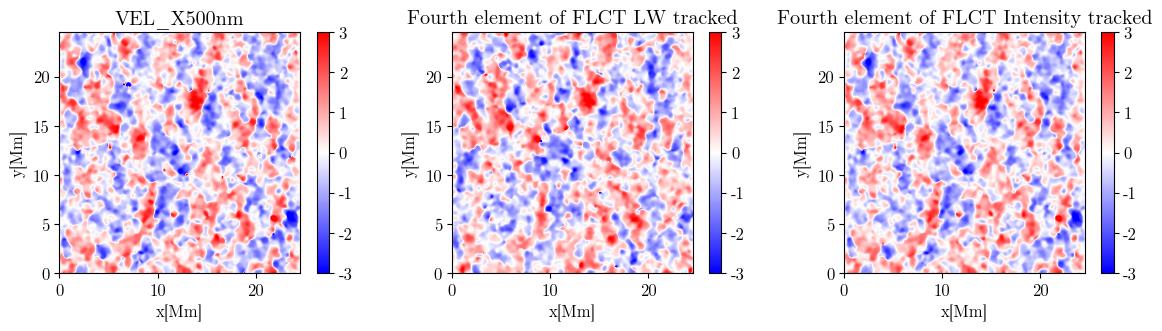

In [32]:
fig = plt.figure(figsize=[12, 3.2])       
#plt.suptitle("Simulated velocities averaged to 15 min; 10 s vs 20, 30, 40, 50, 60 s cadence")# atmos[0] tau


plt.subplot(131)                                      # atmos[1] temp
plt.title("VEL_X500nm")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(vel_x500nm2[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()

plt.subplot(132)                                      # atmos[1] temp
plt.title("Fourth element of FLCT LW tracked")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_LW_600[3, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()


plt.subplot(133)                                      # atmos[1] temp
plt.title("Fourth element of FLCT Intensity tracked")                                # atmos[2]
plt.xlabel("x[Mm]")
plt.ylabel("y[Mm]")
plt.imshow(Vx_tracked_600_30[3, :, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -3, vmax = 3)
plt.colorbar()

fig.tight_layout()
plt.savefig("_hh_ff3", dpi = 100)

In [14]:
r_x500nm2 = pearsonr(vel_x500nm2.flatten(), Vx_LW_600[3].flatten())
print(r_x500nm2)

PearsonRResult(statistic=0.010051094690249071, pvalue=8.966675884432251e-54)


In [21]:
print(len(Vx_LW_600))

29


In [23]:
print(len(Vx_tracked_600_30))

120


In [28]:
Rx = []
for j in range(0, len(Vx_LW_600)):
    rx, p = pearsonr(Vx_LW_600[j].flatten(), Vx_tracked_600_30[j].flatten())
    Rx.append(rx)

In [30]:
Rx = np.asarray(Rx)
print(Rx)

[ 0.17644799  0.58998669  0.60200499  0.01000297 -0.11955878  0.09537827
  0.656707    0.63943966  0.6323798   0.61555203  0.63903198  0.63752263
  0.6330804   0.61369946  0.58924329  0.61688866  0.61590361  0.6267889
  0.60648423  0.59872442  0.60865296  0.60629155  0.62380268  0.60790515
  0.60583617 -0.01987576  0.35005884  0.34706663  0.34914329]


In [34]:
r, pi = pearsonr(Vx_LW_600.flatten(), Vx_tracked_600_30[0:29].flatten())
print(r)

0.0441000583096777
